# Classification

Classification is a task where the goal is to assign input data into predefined categories or classes. The primary objective is to learn a mapping from input features to a set of discrete output labels.

In the context of classification, the model is trained on a labeled dataset, where each data point has an associated label indicating its class.

The model learns patterns and relationships within the data to make predictions on new, unseen instances and assign them to one of the predefined classes.

There are two main types of classification:

1. **Binary Classification:** In binary classification, the task involves distinguishing between two classes, typically labeled as positive and negative. The model predicts whether a given input belongs to one class or the other.

2. **Multiclass Classification:** Multiclass classification deals with scenarios where there are more than two distinct classes. The model is trained to categorize input data into one of several possible classes.

Common algorithms used for classification tasks include logistic regression, decision trees, random forests, support vector machines, and neural networks.

The performance of a classification model is often assessed using metrics such as accuracy, precision, recall, and F1 score.

# MNIST Dataset

The MNIST dataset is a widely used dataset in the field of machine learning and computer vision. It consists of a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9). The goal of the MNIST classification problem is to develop a machine learning model that can accurately identify the digit (0 through 9) represented by each image.

Here are key points about the MNIST classification problem:

1. **Image Size:** Each image in the MNIST dataset is a 28x28 pixel grayscale image, meaning there is only one channel (no color). The pixel values range from 0 to 255, representing the intensity of the pixel.

2. **Classes:** The dataset is divided into 10 classes, one for each digit (0 through 9). The task is to classify each image into the correct digit class.

 It has become a standard dataset for testing and comparing the performance of various machine learning algorithms and architectures.

 Many introductory tutorials and courses in machine learning use MNIST as a starting point for hands-on practice.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Defining the CNN model

In [ ]:
# Set random seed for reproducibility
#torch.manual_seed(42)

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        print('input: (x)',x.shape)

        x = self.conv1(x)
        print('conv1(x)',x.shape)

        x = self.relu1(x)
        print('relu1(x)',x.shape)

        x = self.pool(x)
        print('pool1(x)',x.shape)

        x = self.conv2(x)
        print('conv2(x)',x.shape)

        x = self.relu2(x)
        print('relu2(x)',x.shape)

        x = self.pool(x)
        print('pool(x)',x.shape)

        x = x.view(-1, 64 * 7 * 7)
        print('reshape(x) into single dimension vector',x.shape)

        x = self.fc1(x)
        print('fc1',x.shape)

        x = self.relu3(x)
        print('relu3',x.shape)

        x = self.fc2(x)
        print('fc2',x.shape)

        return x

Defining a Convolutional Neural Network (CNN) programmatically involves specifying the architecture of the network using a deep learning framework like PyTorch. Here is an example of how to define a simple CNN for image classification using PyTorch:

In this example:

- The `SimpleCNN` class inherits from `nn.Module`, the base class for all PyTorch neural network modules.
- The `__init__` method defines the layers of the CNN, including convolutional layers, activation functions (ReLU), max-pooling layers, and fully connected layers.
- The `forward` method specifies the forward pass of the network, defining how input data flows through the layers.

This is a basic example, and the architecture can be customized based on the specific requirements of your image classification task. You can add more convolutional layers, adjust the number of filters, modify kernel sizes, and tailor the network architecture to suit the complexity of your dataset.

In [ ]:
# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('device:',device)

device: cpu


In [ ]:
# Initialize the model
model = CNN().to(device)


# making sample input
temp_input=torch.randn(1,1,28,28)
temp_input=temp_input.to(device)
print('temp_input.shape',temp_input.shape)

# checking the sample output.
temp_output=model(temp_input)
print('temp_output.shape',temp_output.shape)

temp_input.shape torch.Size([1, 1, 28, 28])
input: (x) torch.Size([1, 1, 28, 28])
conv1(x) torch.Size([1, 32, 28, 28])
relu1(x) torch.Size([1, 32, 28, 28])
pool1(x) torch.Size([1, 32, 14, 14])
conv2(x) torch.Size([1, 64, 14, 14])
relu2(x) torch.Size([1, 64, 14, 14])
pool(x) torch.Size([1, 64, 7, 7])
reshape(x) into single dimension vector torch.Size([1, 3136])
fc1 torch.Size([1, 128])
relu3 torch.Size([1, 128])
fc2 torch.Size([1, 10])
temp_output.shape torch.Size([1, 10])


It looks like you've defined a simple CNN model in PyTorch and added print statements in the `forward` method to display the shape of the tensor at different stages of the network. This can be very helpful for understanding the size changes in the feature maps as they pass through each layer.

Here's a brief explanation of each step:

1. **Input:** The input tensor `x` has the shape `(batch_size, 1, 28, 28)` where `1` represents the number of input channels (grayscale).

2. **Convolution 1 (`conv1`):** Applies the first convolutional layer with 32 filters and a kernel size of 3x3.

  The output shape is `(batch_size, 32, 28, 28)`.

3. **ReLU Activation 1 (`relu1`):** Applies the rectified linear unit activation function element-wise. The output shape remains the same.

4. **Max Pooling 1 (`pool1`):** Applies max pooling with a kernel size of 2x2 and a stride of 2.

  The output shape is `(batch_size, 32, 14, 14)`.

5. **Convolution 2 (`conv2`):** Applies the second convolutional layer with 64 filters and a kernel size of 3x3.

  The output shape is `(batch_size, 64, 14, 14)`.

6. **ReLU Activation 2 (`relu2`):** Applies the rectified linear unit activation function element-wise.
The output shape remains the same.

7. **Max Pooling 2 (`pool2`):** Applies max pooling with a kernel size of 2x2 and a stride of 2.

  The output shape is `(batch_size, 64, 7, 7)`.

8. **Flatten (`view`):** Reshapes the tensor into a single-dimensional vector.

  The output shape is `(batch_size, 64 * 7 * 7)`.

9. **Fully Connected 1 (`fc1`):** Applies the first fully connected layer with 128 neurons.

  The output shape is `(batch_size, 128)`.

10. **ReLU Activation 3 (`relu3`):** Applies the rectified linear unit activation function element-wise.

  The output shape remains the same.

11. **Fully Connected 2 (`fc2`):** Applies the final fully connected layer with 10 neurons (assuming 10 classes for classification).

  The output shape is `(batch_size, 10)`.

Each print statement in the `forward` method indicates the shape of the tensor at that specific stage, providing insights into how the data transforms through the network.

In [ ]:
# Load MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

For any training,

- The dataset is split into `train_dataset` , `val_dataset` and `test_dataset` .

- The `DataLoader` is created for each subset of the dataset (training, validation, and testing).

Feel free to adjust the sizes of training, validation, and test datasets.

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=False)

In these lines of code, you are creating PyTorch `DataLoader` objects for the training and test datasets. `DataLoader` is a PyTorch utility that provides an iterable over a dataset, making it easier to iterate through batches during training or testing. Here's an explanation of each line:

1. **Training DataLoader:**

   - `train_dataset`: This is the dataset you created for training (presumably containing a subset of the MNIST training images).
   - `batch_size=8`: It specifies the number of samples in each batch that the `DataLoader` will provide during each iteration.
   - `shuffle=True`: This means that the data will be shuffled randomly at the beginning of each epoch. Shuffling the data helps the model generalize better during training.

2. **Test DataLoader:**

   - `test_dataset`: This is the dataset you created for testing (presumably containing MNIST test images).
   - `batch_size=8`: Similar to the training loader, it specifies the batch size for the test loader.
   - `shuffle=False`: In testing, you typically don't want to shuffle the data. This ensures that the order of the test samples remains the same during evaluation.

By using these DataLoader objects, you can iterate through the training and test datasets in batches, which is beneficial for both memory efficiency and training stability. The specified batch size influences the number of samples processed in each forward and backward pass during training or testing.

In [ ]:
print('dataset details:')
print('number of images in training dataset',len(train_dataset))
print('number of images in testing dataset',len(test_dataset))

print('number of training batches',len(train_loader))
print('number of testing batches',len(test_loader))

dataset details:
number of images in training dataset 60000
number of images in testing dataset 10000
number of training batches 7500
number of testing batches 1250


- Due to computational constraints, we are partitioning the dataset and utilizing only a few of the images for the training process.
- The dataset can be split into subdatasets using the `random_split` function. The sizes of the training, validation, and test datasets are specified (`train_size`, `val_size`, `test_size`).

In [ ]:
from torch.utils.data import random_split, DataLoader

# Define transformation for the dataset (convert images to PyTorch tensors)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST train dataset
full_train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
print('number of trainig images from full_train_dataset:',len(full_train_dataset))

# Split the training dataset into training and validation sets
train_size = 10000  # Number of images for training
val_size = 1000    # Number of images for validation
test_size=1000
remaining_size=len(full_train_dataset)-(train_size+val_size+test_size)

train_dataset, val_dataset,test_dataset,remaining_dataset = random_split(full_train_dataset, [train_size, val_size,test_size,remaining_size])
print('Split of data :')
print('training :',len(train_dataset ))
print('validation :',len(val_dataset))
print('testing :',len(test_dataset))
print('no of images which are not using is',len(remaining_dataset))

# Create DataLoader for training, validation, and testing
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)


number of trainig images from full_train_dataset: 60000
Split of data :
training : 10000
validation : 1000
testing : 1000
no of images which are not using is 48000


   This uses `random_split` to split the full training dataset into training, validation, and test sets based on the specified sizes. The remaining images not used in training, validation, or testing are stored in `remaining_dataset`.

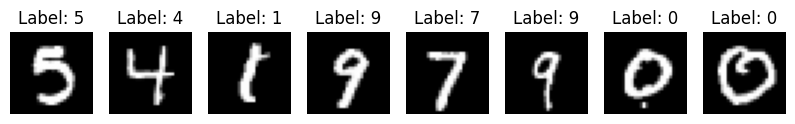

images.shape torch.Size([8, 1, 28, 28])
labels.shape torch.Size([8])


In [ ]:
import matplotlib.pyplot as plt

# Function to show images
def show_images(images, labels):
    plt.figure(figsize=(10, 3))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.title(f"Label: {labels[i].item()}")
        plt.imshow(images[i][0], cmap="gray")
        plt.axis('off')
    plt.show()

# Display a batch of images
for images, labels in train_loader:
    show_images(images, labels)
    print('images.shape',images.shape)
    print('labels.shape',labels.shape)

    break  # Show only the first batch

This code is helpful for visualizing a batch of images from the training dataset along with their corresponding labels.

It's a useful practice to inspect the data during the development process to ensure that it is loaded and preprocessed correctly.

In [ ]:
# Initialize the  loss function, and optimizer
criterion = nn.CrossEntropyLoss()

   The `nn.CrossEntropyLoss()` is a commonly used loss function for classification problems. It combines the softmax activation function and the negative log-likelihood loss. It is suitable for multi-class classification tasks, such as the MNIST digit classification problem where each image can belong to one of the ten classes (digits 0 through 9). The CrossEntropyLoss automatically applies the softmax function to the model's output and computes the log-likelihood loss.

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

 Here, you are using the Adam optimizer (`optim.Adam`) to update the parameters of your neural network during the training process. The optimizer takes as input the parameters of the model (`model.parameters()`) and the learning rate (`lr=0.001`).

 The learning rate determines the step size during optimization and is a hyperparameter that needs to be tuned based on the specific problem.

   The `Adam` optimizer is an adaptive learning rate optimization algorithm that combines ideas from momentum and RMSprop. It is widely used in deep learning due to its effectiveness in training neural networks.

These two components work together during the training loop: the loss function computes the difference between the model's predictions and the actual labels, and the optimizer adjusts the model's parameters based on this loss to improve its performance.

In [ ]:
num_epochs = 10

In [ ]:
# Lists to store training and validation losses
train_losses = []
val_losses = []


# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0


    tqdm_train_loader = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}, Training')

    for images, labels in tqdm_train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # forward pass
        outputs = model(images)

        # calculating the loss
        loss = criterion(outputs, labels)

        # performing back-propgation
        loss.backward()

        # updating the CNN weights based on the gradients which calulcated in the back-propgation
        optimizer.step()

        running_loss += loss.item()
        tqdm_train_loader.set_postfix({'loss': running_loss / len(train_loader)})

    # Compute average training loss for the epoch

    average_train_loss = running_loss / len(train_loader)
    train_losses.append(average_train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for val_images, val_labels in val_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = model(val_images)
            #computes the validation loss
            val_loss += criterion(val_outputs, val_labels).item()

            #tracks the number of correct predictions for accuracy calculation.
            _, val_predicted = torch.max(val_outputs.data, 1)
            total_val += val_labels.size(0)
            correct_val += (val_predicted == val_labels).sum().item()

    average_val_loss = val_loss / len(val_loader)

    #The training and validation losses are recorded for further analysis, such as plotting learning curves.
    val_losses.append(average_val_loss)

    val_accuracy = correct_val / total_val

    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss/len(val_loader)}, Validation Accuracy: {val_accuracy * 100:.2f}%")



Epoch 1/10, Training: 100%|██████████| 1250/1250 [00:23<00:00, 53.19it/s, loss=0.281]


Epoch 1/10, Loss: 0.2814890363310464
Epoch 1/10, Validation Loss: 0.13982510721264407, Validation Accuracy: 96.60%


Epoch 2/10, Training: 100%|██████████| 1250/1250 [00:20<00:00, 62.39it/s, loss=0.0844]


Epoch 2/10, Loss: 0.08442394438626652
Epoch 2/10, Validation Loss: 0.09695438801313867, Validation Accuracy: 97.20%


Epoch 3/10, Training: 100%|██████████| 1250/1250 [00:20<00:00, 60.65it/s, loss=0.0593]


Epoch 3/10, Loss: 0.05930589235351799
Epoch 3/10, Validation Loss: 0.08601578428864014, Validation Accuracy: 97.80%


Epoch 4/10, Training: 100%|██████████| 1250/1250 [00:20<00:00, 62.15it/s, loss=0.0346]


Epoch 4/10, Loss: 0.03458834332321551
Epoch 4/10, Validation Loss: 0.10227034933079267, Validation Accuracy: 97.40%


Epoch 5/10, Training: 100%|██████████| 1250/1250 [00:20<00:00, 60.90it/s, loss=0.0287]


Epoch 5/10, Loss: 0.028706327854806413
Epoch 5/10, Validation Loss: 0.06698691723751107, Validation Accuracy: 98.20%


Epoch 6/10, Training: 100%|██████████| 1250/1250 [00:20<00:00, 61.46it/s, loss=0.0261]


Epoch 6/10, Loss: 0.02606139803075955
Epoch 6/10, Validation Loss: 0.10457803801731097, Validation Accuracy: 97.30%


Epoch 7/10, Training: 100%|██████████| 1250/1250 [00:20<00:00, 59.66it/s, loss=0.0182]


Epoch 7/10, Loss: 0.018243073367644382
Epoch 7/10, Validation Loss: 0.08014949765136589, Validation Accuracy: 98.30%


Epoch 8/10, Training: 100%|██████████| 1250/1250 [00:20<00:00, 62.16it/s, loss=0.0185]


Epoch 8/10, Loss: 0.018528038451832027
Epoch 8/10, Validation Loss: 0.09805010378717406, Validation Accuracy: 97.90%


Epoch 9/10, Training: 100%|██████████| 1250/1250 [00:19<00:00, 63.17it/s, loss=0.0167]


Epoch 9/10, Loss: 0.016706978028532476
Epoch 9/10, Validation Loss: 0.1583061449809021, Validation Accuracy: 96.80%


Epoch 10/10, Training: 100%|██████████| 1250/1250 [00:20<00:00, 61.76it/s, loss=0.0123]


Epoch 10/10, Loss: 0.012266463171608635
Epoch 10/10, Validation Loss: 0.1889284080648763, Validation Accuracy: 96.80%


# Training loss vs Valiation loss

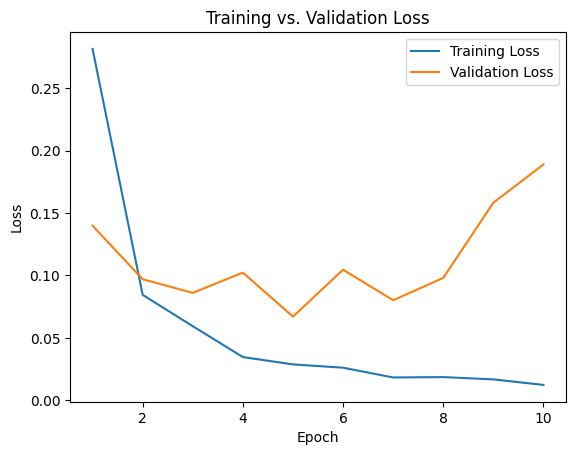

In [ ]:
# Plotting training vs. validation loss curve
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

In [ ]:
print(len(train_losses))
print(len(val_losses))

10
10


In [ ]:
# Test the model on the test set with progress bar
from tqdm import tqdm

model.eval()
correct_test = 0
total_test = 0
tqdm_test_loader = tqdm(test_loader, desc='Testing')
with torch.no_grad():
    for test_images, test_labels in tqdm_test_loader:
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        _, test_predicted = torch.max(test_outputs.data, 1)
        total_test += test_labels.size(0)
        correct_test += (test_predicted == test_labels).sum().item()
        tqdm_test_loader.set_postfix({'accuracy': correct_test / total_test})

tqdm_test_loader.close()

Testing: 100%|██████████| 1000/1000 [00:04<00:00, 242.93it/s, accuracy=0.987]


In [ ]:
remaining_dataset_loader = DataLoader(dataset=remaining_dataset , batch_size=1, shuffle=False)


from tqdm import tqdm

model.eval()
correct_test = 0
total_test = 0
tqdm_test_loader = tqdm(remaining_dataset_loader  ,desc='Testing')
with torch.no_grad():
    for test_images, test_labels in tqdm_test_loader:
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        _, test_predicted = torch.max(test_outputs.data, 1)
        total_test += test_labels.size(0)
        correct_test += (test_predicted == test_labels).sum().item()
        tqdm_test_loader.set_postfix({'accuracy': correct_test / total_test})

tqdm_test_loader.close()

Testing: 100%|██████████| 48000/48000 [03:15<00:00, 245.03it/s, accuracy=0.972]
